# Water Stock Portfolio Risk and Returns 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Water Stock
title = 'Water'
symbols = ['AQN','AWK','AWR','CWT', 'GWRS', 'YORW', 'XYL', 'WTRG']
start = '2021-01-01'
end = '2021-06-18'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
months = (d2.year - d1.year) * 12 + (d2.month - d1.month)
months

5

In [7]:
days = (df.index[-1] - df.index[0]).days
days

164

In [8]:
df.head()

,AQN,AWK,AWR,CWT,GWRS,YORW,XYL,WTRG
Date,,,,,,,,
2021-01-04,16.091688,149.145187,77.538078,53.019135,14.546535,45.562466,99.169624,45.696087
2021-01-05,16.180811,149.988983,77.835579,53.277039,14.457294,45.721775,99.050247,46.309460
2021-01-06,16.418472,151.249741,81.088226,56.490925,15.081991,47.991936,103.228317,47.526310
2021-01-07,16.646231,151.021408,79.422234,55.856083,16.708191,47.304913,107.913742,46.972294
2021-01-08,17.002724,155.836060,80.304817,55.350193,16.737936,47.633492,106.819481,48.199036


In [9]:
df.tail()

,AQN,AWK,AWR,CWT,GWRS,YORW,XYL,WTRG
Date,,,,,,,,
2021-06-11,16.010000,160.360001,82.449997,58.830002,16.746450,52.470001,118.160004,48.860001
2021-06-14,16.200001,160.479996,82.230003,58.849998,17.066000,52.270000,117.269997,48.660000
2021-06-15,16.080000,161.789993,83.089996,58.910000,17.360001,52.330002,118.089996,49.090000
2021-06-16,15.950000,158.470001,82.430000,58.250000,16.809999,51.410000,115.489998,48.070000
2021-06-17,15.000000,162.199997,82.839996,58.430000,17.080000,50.660000,113.940002,48.770000


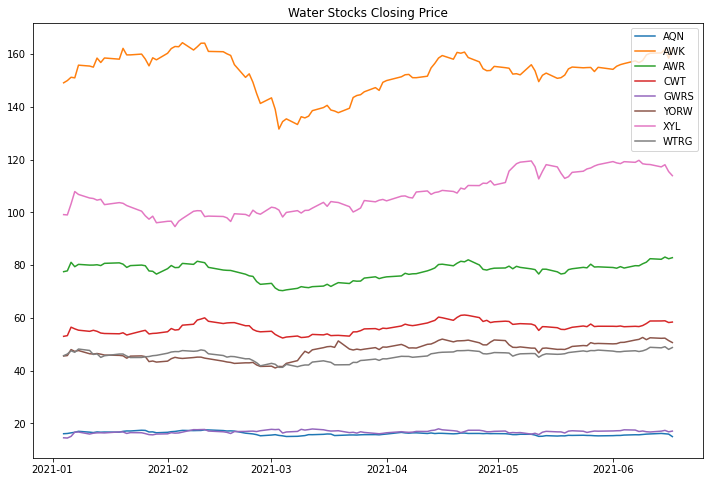

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Stocks Closing Price')
plt.legend(labels=df.columns)

In [11]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

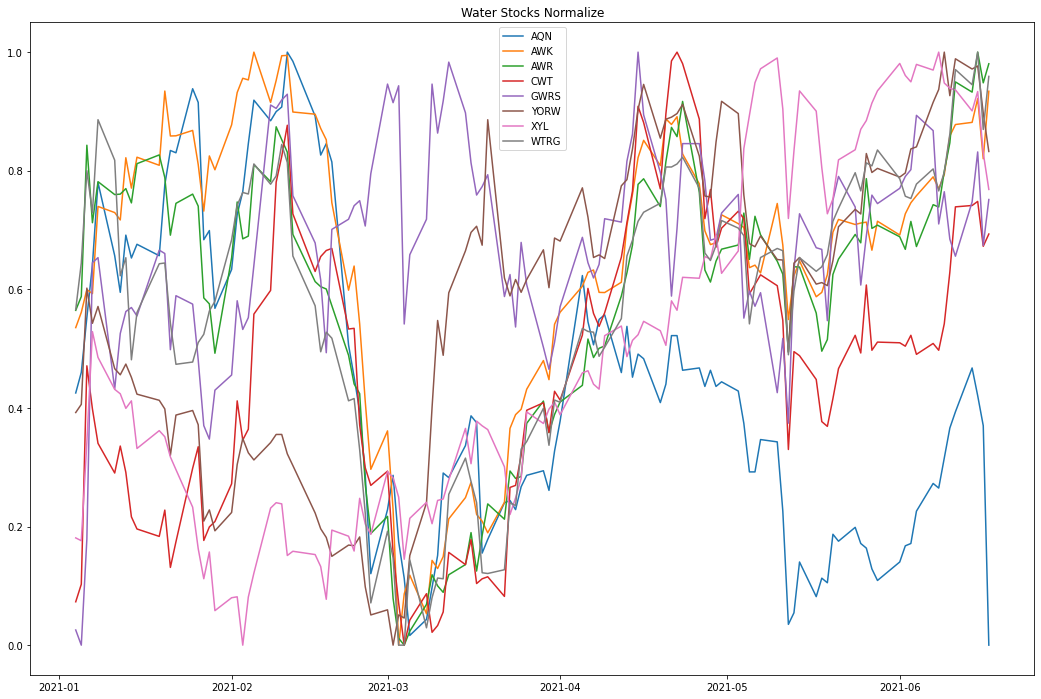

In [12]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [13]:
stock_rets = df.pct_change().dropna()

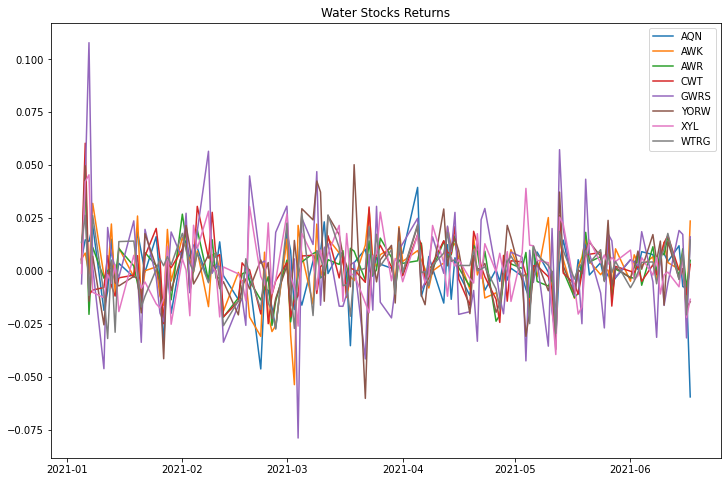

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title +' Stocks Returns')
plt.legend(labels=stock_rets.columns)

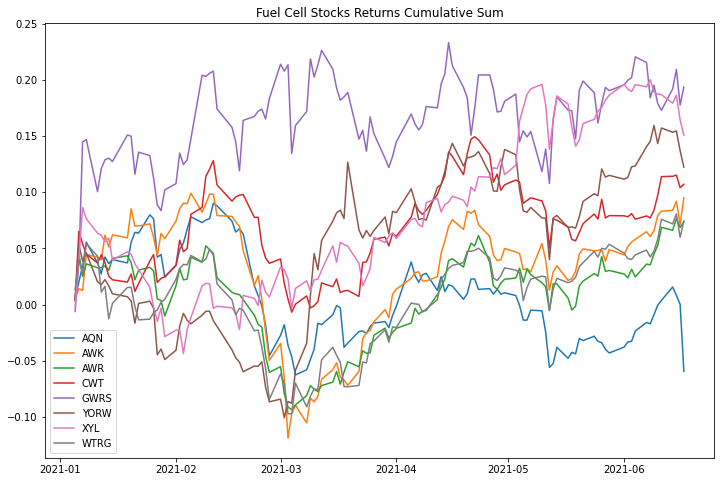

In [15]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Fuel Cell Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

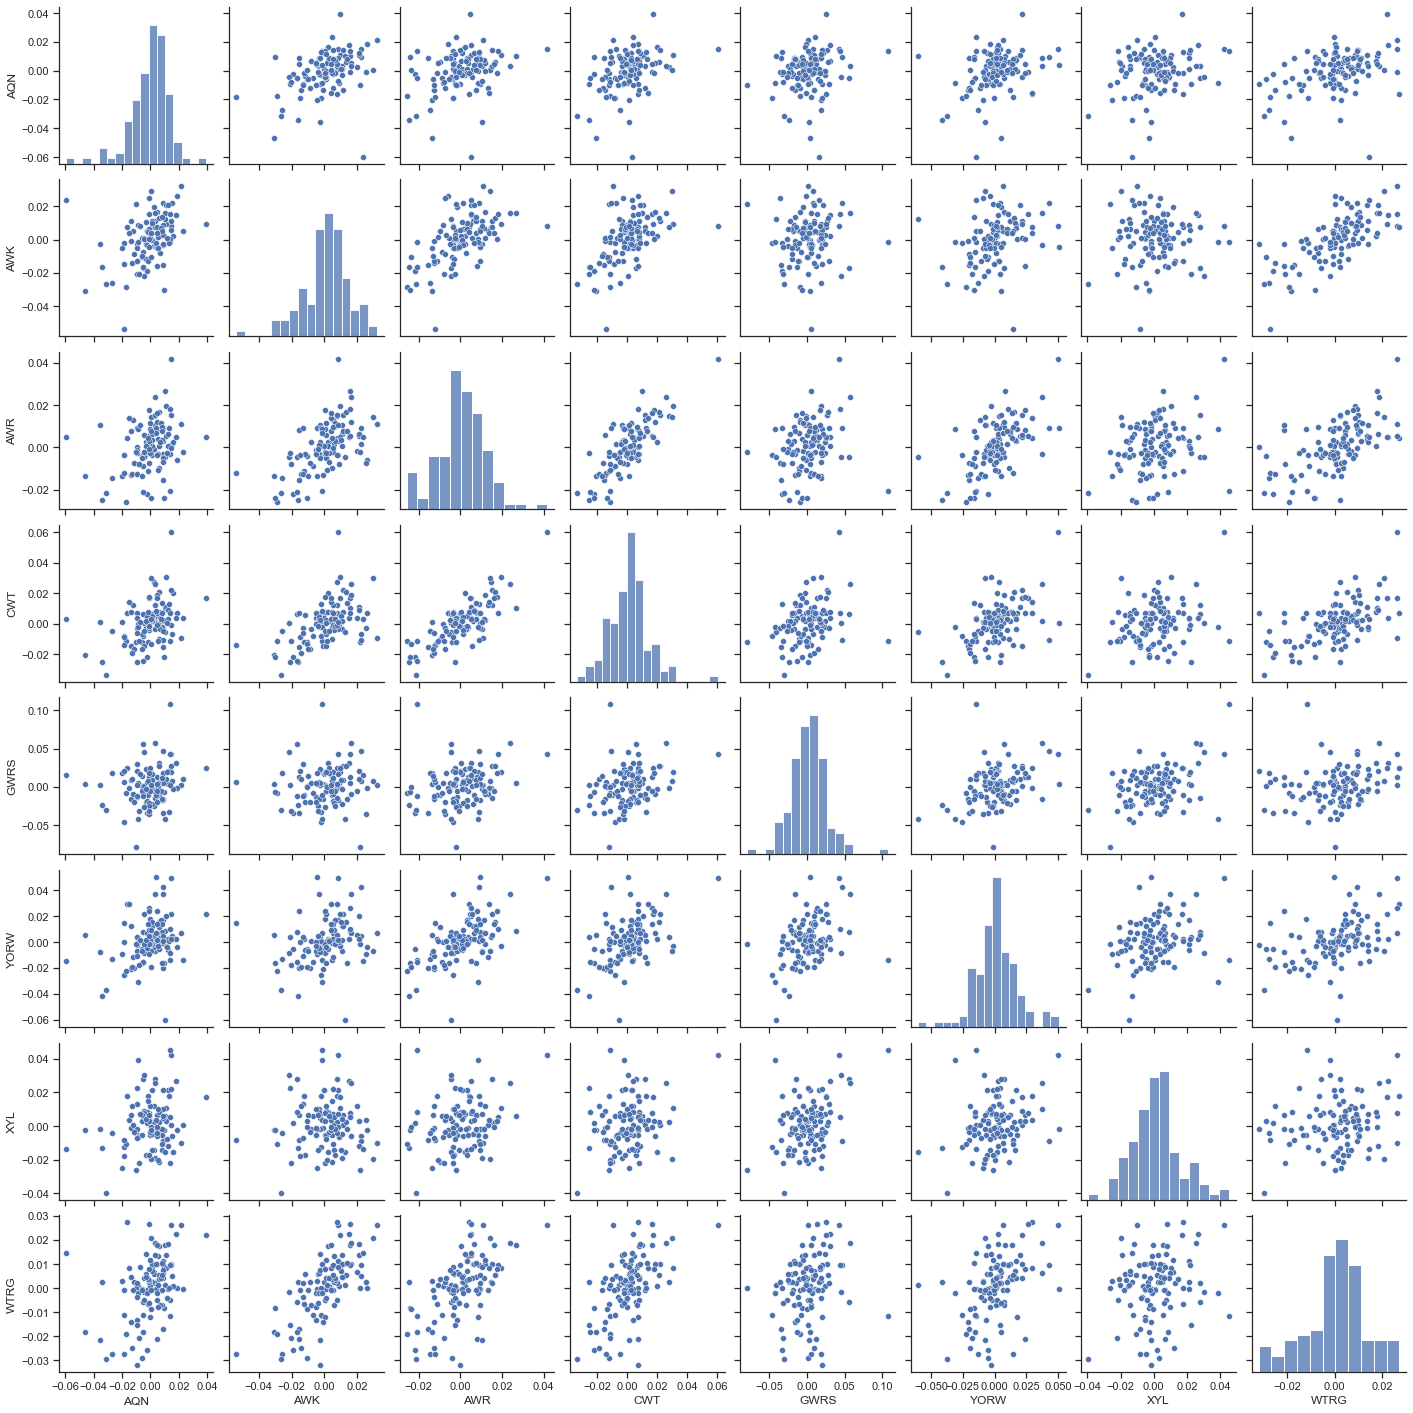

In [16]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

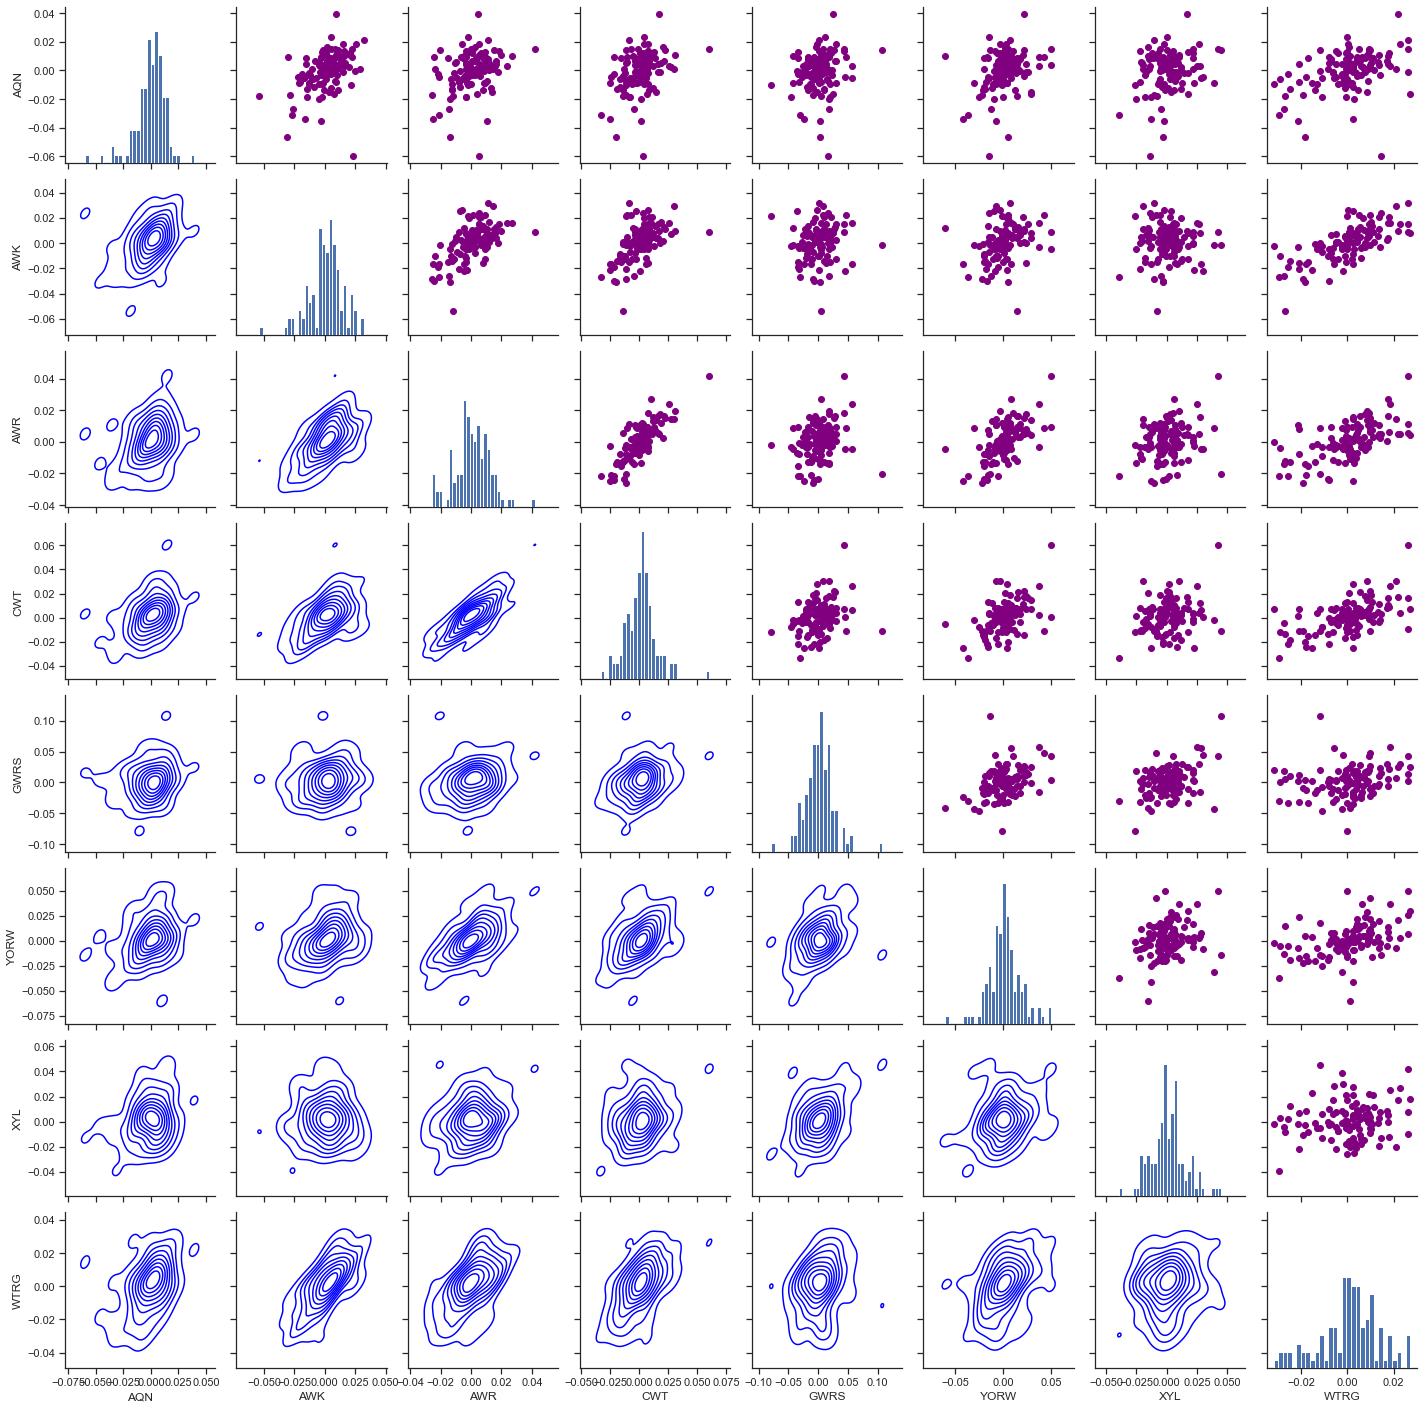

In [17]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

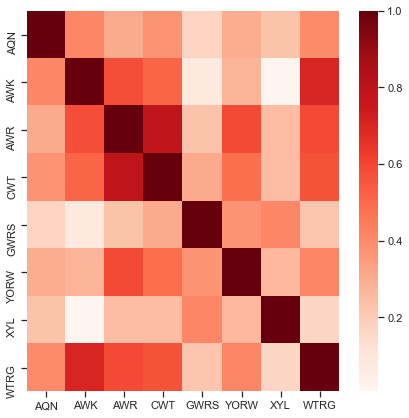

In [18]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

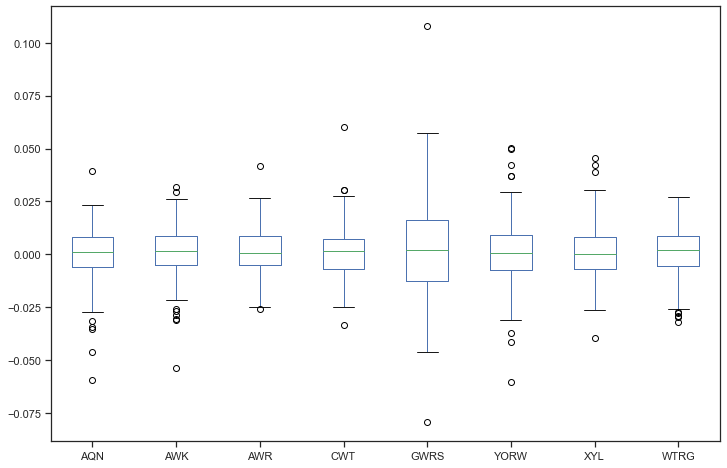

In [19]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

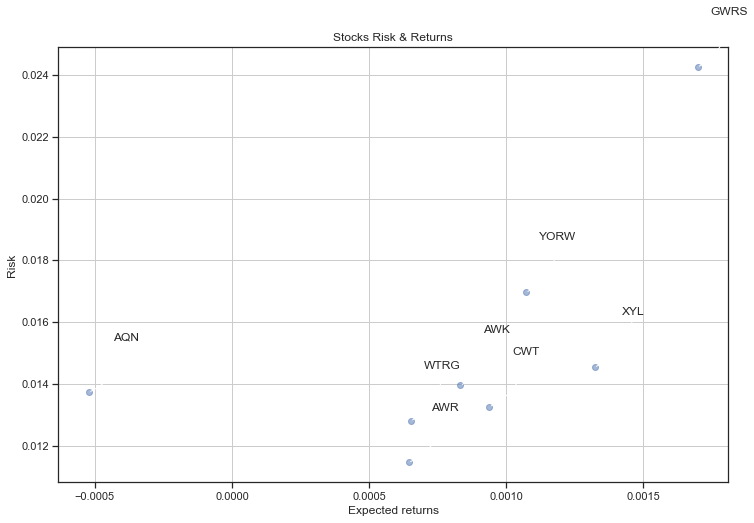

In [20]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

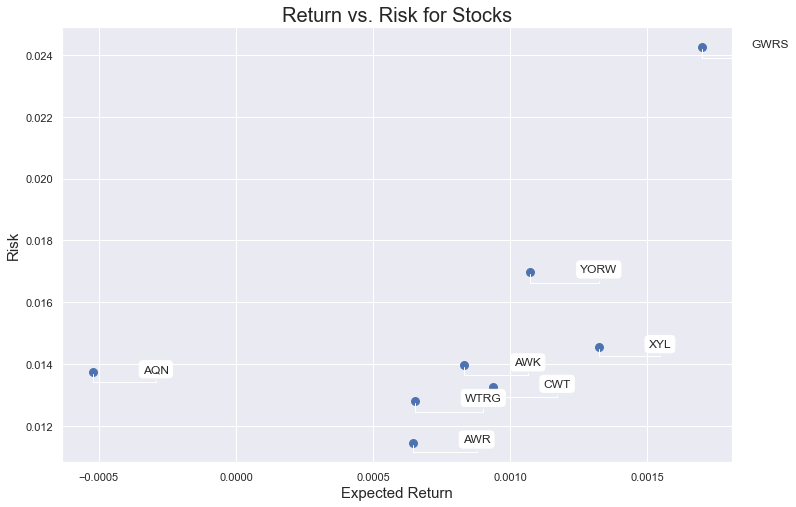

In [21]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [22]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

WTRG  WTRG    1.000000
XYL   XYL     1.000000
AWK   AWK     1.000000
AWR   AWR     1.000000
CWT   CWT     1.000000
                ...   
WTRG  XYL     0.165724
AWK   GWRS    0.078229
GWRS  AWK     0.078229
AWK   XYL     0.006517
XYL   AWK     0.006517
Length: 64, dtype: float64

In [23]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AQN,AWK,AWR,CWT,GWRS,YORW,XYL,WTRG
Date,,,,,,,,
2021-01-05,0.657504,0.693877,0.438203,0.407255,0.389993,0.577317,0.451331,0.766759
2021-01-06,0.749913,0.725958,1.000000,1.000000,0.654129,0.995270,0.962227,0.983909
2021-01-07,0.741674,0.610208,0.077275,0.235155,1.000000,0.416023,1.000000,0.343059
2021-01-08,0.817866,1.000000,0.545905,0.258465,0.432362,0.608553,0.346098,0.981202
2021-01-11,0.413332,0.602547,0.330224,0.270988,0.175484,0.314726,0.316362,0.352744


In [24]:
Normalized_Value.corr()

,AQN,AWK,AWR,CWT,GWRS,YORW,XYL,WTRG
AQN,1.000000,0.414033,0.308962,0.377098,0.176483,0.300493,0.230793,0.400459
AWK,0.414033,1.000000,0.580059,0.515210,0.078229,0.277962,0.006517,0.708625
AWR,0.308962,0.580059,1.000000,0.792928,0.229248,0.586184,0.248382,0.592487
CWT,0.377098,0.515210,0.792928,1.000000,0.307307,0.490191,0.248592,0.565928
GWRS,0.176483,0.078229,0.229248,0.307307,1.000000,0.374658,0.414804,0.221932
YORW,0.300493,0.277962,0.586184,0.490191,0.374658,1.000000,0.269311,0.420316
XYL,0.230793,0.006517,0.248382,0.248592,0.414804,0.269311,1.000000,0.165724
WTRG,0.400459,0.708625,0.592487,0.565928,0.221932,0.420316,0.165724,1.000000


In [25]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

WTRG  WTRG    1.000000
XYL   XYL     1.000000
AWK   AWK     1.000000
AWR   AWR     1.000000
CWT   CWT     1.000000
                ...   
WTRG  XYL     0.165724
AWK   GWRS    0.078229
GWRS  AWK     0.078229
AWK   XYL     0.006517
XYL   AWK     0.006517
Length: 64, dtype: float64

In [26]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AQN    -0.000522
AWK     0.000833
AWR     0.000645
CWT     0.000939
GWRS    0.001699
YORW    0.001073
XYL     0.001323
WTRG    0.000653
dtype: float64
--------------------------------------------------
Stock risks:
AQN     0.013730
AWK     0.013953
AWR     0.011456
CWT     0.013260
GWRS    0.024254
YORW    0.016962
XYL     0.014544
WTRG    0.012803
dtype: float64


In [27]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
AQN,-0.000522,0.013730
AWR,0.000645,0.011456
WTRG,0.000653,0.012803
AWK,0.000833,0.013953
CWT,0.000939,0.013260
YORW,0.001073,0.016962
XYL,0.001323,0.014544
GWRS,0.001699,0.024254


In [28]:
table.sort_values(by='Risk')

,Returns,Risk
AWR,0.000645,0.011456
WTRG,0.000653,0.012803
CWT,0.000939,0.013260
AQN,-0.000522,0.013730
AWK,0.000833,0.013953
XYL,0.001323,0.014544
YORW,0.001073,0.016962
GWRS,0.001699,0.024254


In [29]:
rf = 0.001
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
AQN,-0.000522,0.013730,-0.110819
AWK,0.000833,0.013953,-0.011943
AWR,0.000645,0.011456,-0.030960
CWT,0.000939,0.013260,-0.004572
GWRS,0.001699,0.024254,0.028803
YORW,0.001073,0.016962,0.004315
XYL,0.001323,0.014544,0.022207
WTRG,0.000653,0.012803,-0.027123


In [30]:
table['Max Returns'] = rets.max()

In [31]:
table['Min Returns'] = rets.min()

In [32]:
table['Median Returns'] = rets.median()

In [33]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211


In [34]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112,-0.000374
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755,0.000142
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387,0.000030
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013,0.000019
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190,0.000097
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860,-0.000090
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104,-0.000082
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211,0.000088


In [35]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112,-0.000374,-0.102327
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755,0.000142,0.137616
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387,0.000030,0.106977
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013,0.000019,0.161045
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190,0.000097,0.279804
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860,-0.000090,0.176988
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104,-0.000082,0.237805
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211,0.000088,0.105211


In [36]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112,-0.000374,-0.102327
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860,-0.000090,0.176988
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104,-0.000082,0.237805
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013,0.000019,0.161045
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387,0.000030,0.106977
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211,0.000088,0.105211
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190,0.000097,0.279804
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755,0.000142,0.137616


In [37]:
table['var_99'] = round((rets).quantile(0.01), 3)
table['var_95'] = round((rets).quantile(0.05), 3)

In [38]:
table.sort_values(by='Returns')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112,-0.000374,-0.102327,-0.045,-0.023
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387,0.000030,0.106977,-0.025,-0.021
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211,0.000088,0.105211,-0.029,-0.025
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755,0.000142,0.137616,-0.031,-0.023
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013,0.000019,0.161045,-0.025,-0.021
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860,-0.000090,0.176988,-0.041,-0.021
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104,-0.000082,0.237805,-0.026,-0.021
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190,0.000097,0.279804,-0.046,-0.034


In [39]:
# Pure Profit Score
df = df.dropna()
t = np.arange(0, df.shape[0]).reshape(-1, 1)
regression = LinearRegression().fit(t, df)
r_squared = regression.score(t, df)
table['PPS'] = table['CAGR'] * r_squared

In [40]:
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR,var_99,var_95,PPS
AQN,-0.000522,0.013730,-0.110819,0.039449,-0.059561,0.000896,-5.956112,-0.000374,-0.102327,-0.045,-0.023,-0.027934
AWK,0.000833,0.013953,-0.011943,0.031881,-0.053781,0.001728,2.353755,0.000142,0.137616,-0.031,-0.023,0.037567
AWR,0.000645,0.011456,-0.030960,0.041789,-0.025766,0.000701,0.497387,0.000030,0.106977,-0.025,-0.021,0.029203
CWT,0.000939,0.013260,-0.004572,0.060324,-0.033240,0.001505,0.309013,0.000019,0.161045,-0.025,-0.021,0.043963
GWRS,0.001699,0.024254,0.028803,0.107824,-0.078992,0.002117,1.606190,0.000097,0.279804,-0.046,-0.034,0.076382
YORW,0.001073,0.016962,0.004315,0.050174,-0.060257,0.000784,-1.458860,-0.000090,0.176988,-0.041,-0.021,0.048315
XYL,0.001323,0.014544,0.022207,0.045389,-0.039531,0.000025,-1.342104,-0.000082,0.237805,-0.026,-0.021,0.064917
WTRG,0.000653,0.012803,-0.027123,0.027229,-0.031964,0.002074,1.456211,0.000088,0.105211,-0.029,-0.025,0.028721
